<h1> All imports and functions </h1>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from collections import Counter
from fuzzywuzzy import process

df = pd.read_csv('set11_it1.csv', sep=',')

RealmType = ['RealmType']
Enclave = ['Enclave']

C:\Users\joeri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


<h1> Wrongly named Enclaves

<h3>Check for unique Enclave names

I made an function that checks for how many unique Enclave names there are and if there are any duplicate yet similiar names.

In [5]:
df["Enclave"].unique()

array(['Brightforge', 'Petalbridge', 'Shadowmere', 'Dragonspire',
       'Thornfield', 'Wyverncliff', 'Ravenstone', 'Starfall', 'Riverbend',
       'Emberfall', 'Sunspire', 'Silverglen', 'Duskwood', 'Stormwatch',
       'Mystvale', 'Cloudrest', 'Windwhisper', 'Nighthaven',
       'Glimmerwood', 'Crystalhollow', 'Wolfsbane', 'petalbridge',
       'Mossheart', 'Mosshearts', 'Stormhold', 'STORMWATCH',
       'Dreamweaver', 'Oakenshade', 'STORMHOLD', 'Moonglade', 'emberfall',
       'RAVENSTONE', 'DRAGONSPIRE', 'SUNSPIRE', 'THORNFIELD', 'Verdantia',
       'MOSSHEART', 'wyverncliff', 'silverglen', 'sunspire',
       'Crystalhollows', 'SILVERGLEN', 'Sunspires', 'crystalhollow',
       'Dragonspires', 'starfall', 'Petalbridges', 'duskwood',
       'Windwhispers'], dtype=object)

<h3>Bar plot for visualisation of the unique Enclave names

I made a bar plot to see which names are most commonly used so that the outliers can be filtered out and changed to the most common name as this clears ups the data.

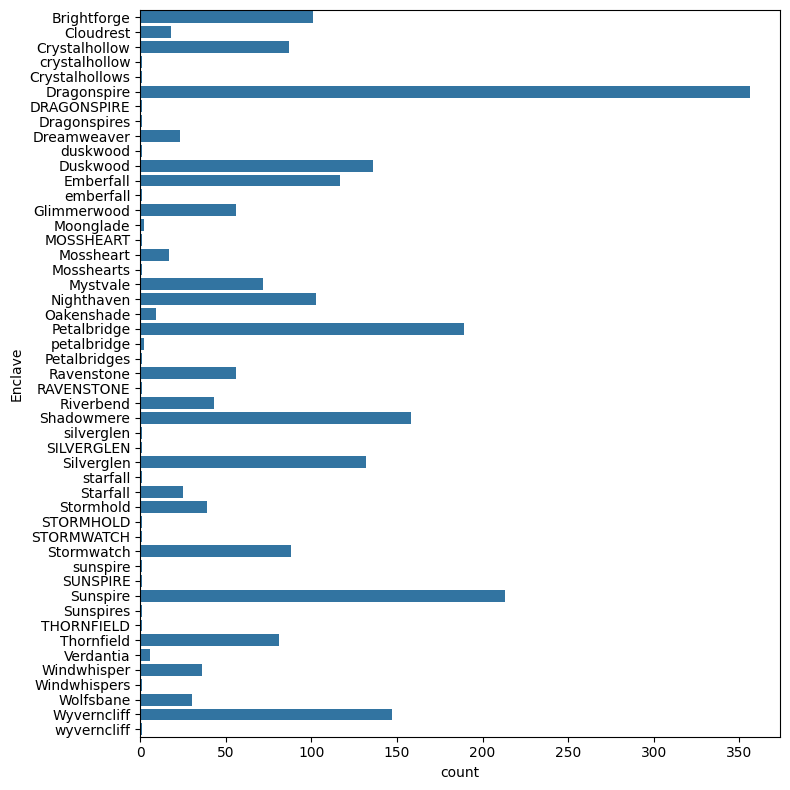

In [6]:
plt.figure(figsize=(8, 8))

# Sort enclaves alphabetically while ignoring case
sorted_counts = df["Enclave"].value_counts().reset_index()
sorted_counts.columns = ["Enclave", "count"]  # Rename columns
sorted_counts = sorted_counts.sort_values(by="Enclave", key=lambda x: x.str.lower())

# Plot
sns.barplot(x=sorted_counts["count"], y=sorted_counts["Enclave"])

plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()

plt.show()


<h3>Replacement of wrongly named Enclaves

Filter out the wrong named data entry so its id and original name can be noted down and the update can be put in.

In [7]:
def standardize_enclaves(enclaves):
    # Count occurrences (case-insensitive)
    name_counts = Counter(enclaves)
    print("\n--- Name Counts ---")
    for name, count in name_counts.items():
        print(f"{name}: {count}")
    print("\n--- End of Name Counts ---\n")

    # Find the most common variant (keeping original casing)
    standardized_names = {}
    most_common_variants = {}

    # Sort names by frequency (most common first)
    sorted_names = sorted(name_counts.keys(), key=lambda k: -name_counts[k])

    # Find best match among already processed names
    for name in sorted_names:
        match_result = process.extractOne(name, most_common_variants.keys(), score_cutoff=85)

        if match_result:
            match, score = match_result
            print(f"Match found for '{name}': '{match}' with score {score}")
            standardized_names[name] = most_common_variants[match]
        else:
            print(f"No match found for '{name}', using as standard.")
            standardized_names[name] = name

        # Store as a new variant
        most_common_variants[name] = name

    print("\n--- Standardized Names ---")
    for name, standard in standardized_names.items():
        print(f"'{name}' => '{standard}'")
    print("\n--- End of Standardized Names ---\n")

    # Replace each name in the original list with the standardized version
    standardized_enclaves = [standardized_names.get(name, name) for name in enclaves]

    return standardized_enclaves

df['Enclave'] = standardize_enclaves(df['Enclave'])
#df.to_csv("dataset11_2.csv", index=False)



--- Name Counts ---
Brightforge: 101
Petalbridge: 189
Shadowmere: 158
Dragonspire: 356
Thornfield: 81
Wyverncliff: 147
Ravenstone: 56
Starfall: 25
Riverbend: 43
Emberfall: 117
Sunspire: 213
Silverglen: 132
Duskwood: 136
Stormwatch: 88
Mystvale: 72
Cloudrest: 18
Windwhisper: 36
Nighthaven: 103
Glimmerwood: 56
Crystalhollow: 87
Wolfsbane: 30
petalbridge: 2
Mossheart: 17
Mosshearts: 1
Stormhold: 39
STORMWATCH: 1
Dreamweaver: 23
Oakenshade: 9
STORMHOLD: 1
Moonglade: 2
emberfall: 1
RAVENSTONE: 1
DRAGONSPIRE: 1
SUNSPIRE: 1
THORNFIELD: 1
Verdantia: 6
MOSSHEART: 1
wyverncliff: 1
silverglen: 1
sunspire: 1
Crystalhollows: 1
SILVERGLEN: 1
Sunspires: 1
crystalhollow: 1
Dragonspires: 1
starfall: 1
Petalbridges: 1
duskwood: 1
Windwhispers: 1

--- End of Name Counts ---

No match found for 'Dragonspire', using as standard.
No match found for 'Sunspire', using as standard.
No match found for 'Petalbridge', using as standard.
No match found for 'Shadowmere', using as standard.
No match found for 'Wyve

<H3>Checking if the Enclave names are now correct

A bar plot is used again to check if the standardisation of the enclave names has gone correctly and that there are no deviations from the most common name.

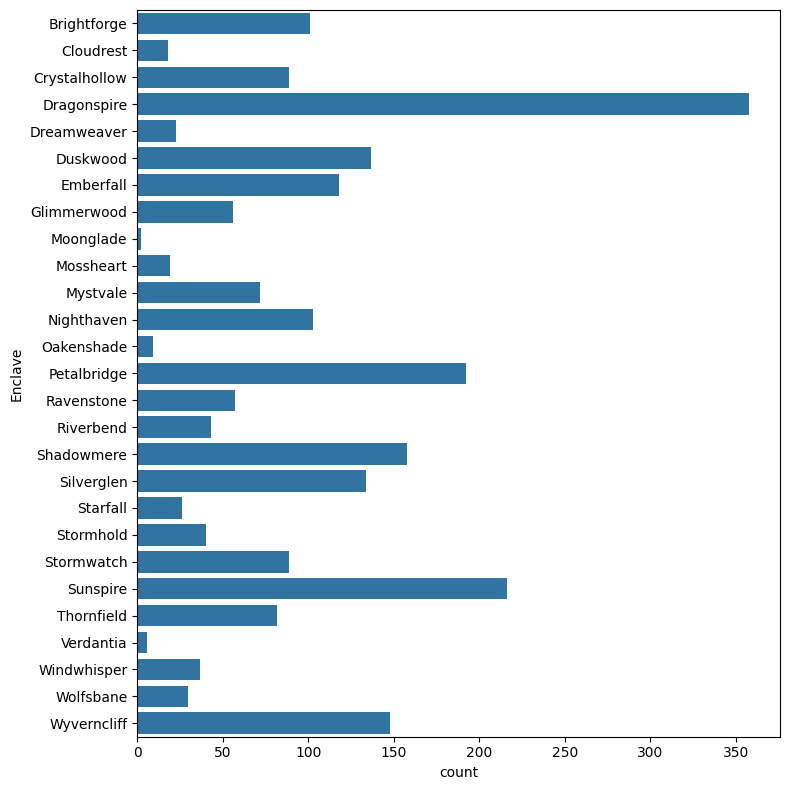

In [8]:
plt.figure(figsize=(8, 8))

# Get unique Enclave counts and rename columns properly
sorted_counts = df["Enclave"].value_counts().reset_index()
sorted_counts.columns = ["Enclave", "count"]  # Rename columns

# Sort enclaves alphabetically while ignoring case
sorted_counts = sorted_counts.sort_values(by="Enclave", key=lambda x: x.str.lower())

# Plot the bar chart
sns.barplot(x=sorted_counts["count"], y=sorted_counts["Enclave"])

plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()

plt.show()

<h1>Realm types

<h3>Unique Realm types

Check for unique Realm types (AN ENCLAVE MAY HAVE MORE THAN ONE REALM TYPE, WHAT DOES THIS MEAN??)

In [9]:
df["RealmType"].unique()

array(['Meadowlands', 'GnomeBurough', 'AetherIsles', 'CitadelQuarter',
       'ArcaneMarket'], dtype=object)

<h3>Enclaves that have more than one Realm type

This cell checks which enclave has more than one realm as this may not be possible and a fix could be used to restore data quality.

In [10]:
multiple_realms = df.groupby("Enclave")["RealmType"].nunique()

filtered_enclaves = multiple_realms[multiple_realms > 1]

print("Enclaves with multiple Realm types:")
for enclave in filtered_enclaves.index:
    print(f"{enclave}: {filtered_enclaves[enclave]} unique Realm types")

print("\nTotal enclaves with multiple Realm types:", len(filtered_enclaves))


Enclaves with multiple Realm types:
Brightforge: 2 unique Realm types
Crystalhollow: 2 unique Realm types
Dragonspire: 2 unique Realm types
Dreamweaver: 2 unique Realm types
Emberfall: 2 unique Realm types
Mystvale: 2 unique Realm types
Petalbridge: 2 unique Realm types
Shadowmere: 3 unique Realm types
Silverglen: 2 unique Realm types
Stormhold: 3 unique Realm types
Stormwatch: 2 unique Realm types
Sunspire: 2 unique Realm types
Thornfield: 3 unique Realm types
Wyverncliff: 2 unique Realm types

Total enclaves with multiple Realm types: 14


<h3>Updating values of Enclaves related to Realm types

Since one enclave can only have one realm type, the enclaves that have more than one realm type have to be updated. For this I determined which Realm type was most used or most common within an Enclave and I updated the Enclave accordingly.

In [11]:
def fix_enclave_realm_type(dataframe):

    # Step 1: Group by Enclave and count unique Realm Types.
    unique_realm_types = dataframe.groupby('Enclave')['RealmType'].nunique()

    # Step 2: Find which Enclaves have more than 1 unique Realm Type.
    problem_enclaves = unique_realm_types[unique_realm_types > 1].index
    print("\nProblem Enclaves (more than 1 unique Realm Type):")
    print(problem_enclaves)

    # Step 3: For each wrong Enclave, find the most common Realm Type.
    for enclaves in problem_enclaves:
        print(f"\nEnclave: {enclaves}")

        # Find the most common Realm Type for this Enclave.
        realm_types_for_enclave = dataframe[dataframe['Enclave'] == enclaves]['RealmType']
        most_common_realm_type = realm_types_for_enclave.mode()[0]
        print(f"Most common Realm Type for {enclaves}: {most_common_realm_type}")

        # Step 4: Update the Realm Type for these Enclaves.
        dataframe.loc[dataframe['Enclave'] == enclaves, 'RealmType'] = most_common_realm_type
        print(f"Updated Realm Types for Enclave: {enclaves}")

    return dataframe
df = fix_enclave_realm_type(df)


Problem Enclaves (more than 1 unique Realm Type):
Index(['Brightforge', 'Crystalhollow', 'Dragonspire', 'Dreamweaver',
       'Emberfall', 'Mystvale', 'Petalbridge', 'Shadowmere', 'Silverglen',
       'Stormhold', 'Stormwatch', 'Sunspire', 'Thornfield', 'Wyverncliff'],
      dtype='object', name='Enclave')

Enclave: Brightforge
Most common Realm Type for Brightforge: Meadowlands
Updated Realm Types for Enclave: Brightforge

Enclave: Crystalhollow
Most common Realm Type for Crystalhollow: Meadowlands
Updated Realm Types for Enclave: Crystalhollow

Enclave: Dragonspire
Most common Realm Type for Dragonspire: Meadowlands
Updated Realm Types for Enclave: Dragonspire

Enclave: Dreamweaver
Most common Realm Type for Dreamweaver: Meadowlands
Updated Realm Types for Enclave: Dreamweaver

Enclave: Emberfall
Most common Realm Type for Emberfall: Meadowlands
Updated Realm Types for Enclave: Emberfall

Enclave: Mystvale
Most common Realm Type for Mystvale: GnomeBurough
Updated Realm Types for Enc

<h3>Checking again

By checking again for Enclaves that have multiple realms we make sure that there are no mistakes left behind.

In [12]:
multiple_realms = df.groupby("Enclave")["RealmType"].nunique()

filtered_enclaves = multiple_realms[multiple_realms > 1]

print("Enclaves with multiple RealmTypes:")
for enclave in filtered_enclaves.index:
    print(f"{enclave}: {filtered_enclaves[enclave]} unique RealmTypes")

print("\nTotal enclaves with multiple RealmTypes:", len(filtered_enclaves))

Enclaves with multiple RealmTypes:

Total enclaves with multiple RealmTypes: 0


<h1>Negative values

<h3>Negative Parcel size

Checks for inconsistencies where the Parcel Size is negative + adds the total counts where this happens and the id of the row.

In [13]:
s1 = df['ParcelSize'] > 0
s1 = ~s1
s1.sum()

11

Also checks but in a different way.

In [14]:
PS = df['ParcelSize']

wrong_data = df[PS < 0 ]

wrong_data = wrong_data[['DI', 'ParcelSize']]


print("Rows where 'ParcelSize' is less than 0.':")
print(tabulate(wrong_data, headers='keys', tablefmt='pretty', showindex=False))
print(f"\nTotal count: {len(wrong_data)}")


Rows where 'ParcelSize' is less than 0.':
+--------+------------+
|   DI   | ParcelSize |
+--------+------------+
| 492.0  |  -11367.0  |
| 742.0  |  -9900.0   |
| 865.0  |  -8050.0   |
| 1160.0 |  -12633.0  |
| 1275.0 |  -7993.0   |
| 1356.0 |  -8982.0   |
| 1557.0 |  -8923.0   |
| 1746.0 |  -13070.0  |
| 1754.0 |  -14157.0  |
| 1911.0 |  -14145.0  |
| 2123.0 |  -4224.0   |
+--------+------------+

Total count: 11


<h1> Duplicate data

<h3> Finding the duplicate entries

This cell checks whether there is duplicate data.

In [15]:
df[df.duplicated()]

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
64,63,189000.0,Meadowlands,Brightforge,1419.0,11218.0,sqft
152,150,260000.0,AetherIsles,Wyverncliff,1144.0,4835.0,sqft
155,152,246000.0,Meadowlands,Thornfield,1266.0,3811.0,sqft
217,213,142000.0,Meadowlands,Dragonspire,887.0,11556.0,sqft
264,259,171500.0,Meadowlands,Duskwood,1031.0,10176.0,sqft
327,321,125000.0,Meadowlands,Shadowmere,895.0,10880.0,sqft
333,326,78000.0,GnomeBurough,Petalbridge,691.0,6756.0,sqft
476,468,148500.0,Meadowlands,Dragonspire,NaN,8750.0,sqft
484,475,100000.0,GnomeBurough,Starfall,759.0,1680.0,sqft
522,512,113000.0,GnomeBurough,Stormwatch,806.0,6380.0,sqft


This cell counts up how many duplicates are in the dataset.

In [16]:
s= df.duplicated()
s.sum()                 #Do not forget to add "()" as otherwise it would give you the booleans.

23

<h3>Taking out the duplicate data

This cell drops every duplicate entry as well as check if there are any duplicates are left.

In [17]:
df=df.drop_duplicates()

 <h1>Living quarters #TODO: FIND OUT HOW TO FIX THE NULL

<h3>Whatever you do (delete or populate) have reasoning behind it!!

<h1>Parcel size unit

<h3> Different types of unit sizes

The first thing to do is to check if there are different types of unit sizes and how many counts there are of each.

In [18]:
unique_PSU= df["ParcelSizeUnit"].unique()
print(unique_PSU)

count_sqm= df['ParcelSizeUnit'].value_counts().get('sqm', 0)
print("Occurrences of 'sqm':", count_sqm)


['sqft' 'sqm']
Occurrences of 'sqm': 23


As can be seen there are two different types of Parcel size unit and sqft is the most common one used. Now lets take a sample to look if anything interesting differs between sqm and sqft.

In [19]:
from tabulate import tabulate

def display_parcel_sizes_with_decimals(df, parcel_size, parcel_unit):

    filtered_df = df[df[parcel_size].apply(lambda x: isinstance(x, (int, float)) and round(x, 2) != x)]

    if not filtered_df.empty:
        table_data = filtered_df[[parcel_size, parcel_unit]].values.tolist()
        print(tabulate(table_data, headers=[parcel_size, parcel_unit], tablefmt='pretty', showindex=False))
    else:
        print("No parcels found with more than two decimal places.")

# Example usage
display_parcel_sizes_with_decimals(df, "ParcelSize", "ParcelSizeUnit")


+-------------+----------------+
| ParcelSize  | ParcelSizeUnit |
+-------------+----------------+
|   0.13108   |      sqft      |
|  766.44975  |      sqm       |
| 1001.865952 |      sqm       |
|   0.05805   |      sqft      |
| 840.307635  |      sqm       |
|  629.88234  |      sqm       |
|    0.072    |      sqft      |
| 762.919436  |      sqm       |
|   0.07406   |      sqft      |
| 624.122354  |      sqm       |
|  929.95903  |      sqm       |
| 982.263419  |      sqm       |
| 1212.38415  |      sqm       |
|   0.10331   |      sqft      |
| 979.847941  |      sqm       |
|   0.10141   |      sqft      |
|   0.09457   |      sqft      |
| 1512.925355 |      sqm       |
|   0.08246   |      sqft      |
| 765.427817  |      sqm       |
| 771.466512  |      sqm       |
| 1256.605978 |      sqm       |
|  668.9016   |      sqm       |
|  966.1912   |      sqm       |
|  969.90732  |      sqm       |
| 1273.142712 |      sqm       |
|   0.07207   |      sqft      |
|   0.0824

<h1>Reset index

When you add or delete rows the index may not be up to date anymore. When this happens you can use this function to reset the index.

In [20]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DI              2340 non-null   int64  
 1   TradeValue      2340 non-null   float64
 2   RealmType       2340 non-null   object 
 3   Enclave         2340 non-null   object 
 4   LivingQuarters  2223 non-null   float64
 5   ParcelSize      2340 non-null   float64
 6   ParcelSizeUnit  2340 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 128.1+ KB


Left Join New Dataset added StructuralIntegrity & ExteriorCharm

In [26]:
df2 = pd.read_csv('set11_it2.csv', sep=',')

merged_df = df.merge(df2, on='DI', how='left')

# plt.figure(figsize=(8, 8))
# plt.title("TradeValue Distribution")
# plt.hist(df['TradeValue'], bins=50, color='blue', alpha=0.7, label='set11_it1')
# plt.xlabel('TradeValue')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

print(merged_df)

        DI  TradeValue     RealmType        Enclave  LivingQuarters  \
0        0    269500.0   Meadowlands    Brightforge          2143.0   
1        1    184900.0   Meadowlands    Brightforge           923.0   
2        2     87000.0  GnomeBurough    Petalbridge           959.0   
3        3    130000.0   Meadowlands     Shadowmere           798.0   
4        4    144000.0   Meadowlands    Dragonspire          1172.0   
...    ...         ...           ...            ...             ...   
2358  2335    146000.0   Meadowlands  Crystalhollow           839.0   
2359  2336     88250.0  GnomeBurough      Wolfsbane           839.0   
2360  2337    182000.0   AetherIsles    Wyverncliff          1098.0   
2361  2338    128000.0   Meadowlands     Shadowmere           901.0   
2362  2339     85000.0  GnomeBurough       Mystvale          1173.0   

      ParcelSize ParcelSizeUnit  StructuralIntegrity ExteriorCharm  
0         7939.0           sqft                    5        Common  
1        